In [1]:
%pip install seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pd.options.display.max_columns=None

In [3]:
df = pd.read_csv(r"C:\Users\vivek\OneDrive\Desktop\MULTIDISEASE\Dataset\heart.csv")


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df.shape

(303, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
print("Number of Rows: ",df.shape[0])
print("Number of Columns: ",df.shape[1])

Number of Rows:  303
Number of Columns:  14


In [9]:
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
#check missing value
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
#check duplicate value
df_dup=df.duplicated().any()

In [12]:
df_dup

np.True_

In [13]:
df=df.drop_duplicates()

In [14]:
df_dup=df.duplicated().any()

In [15]:
df_dup

np.False_

In [16]:
cate_val=[]
cont_val=[]

for column in df.columns:
    if df[column].nunique()<=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [17]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [18]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [19]:
df['cp']

0      3
1      2
2      1
3      1
4      0
      ..
298    0
299    3
300    0
301    0
302    1
Name: cp, Length: 302, dtype: int64

In [20]:
df['cp'].unique()

array([3, 2, 1, 0])

In [21]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [22]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<Axes: >

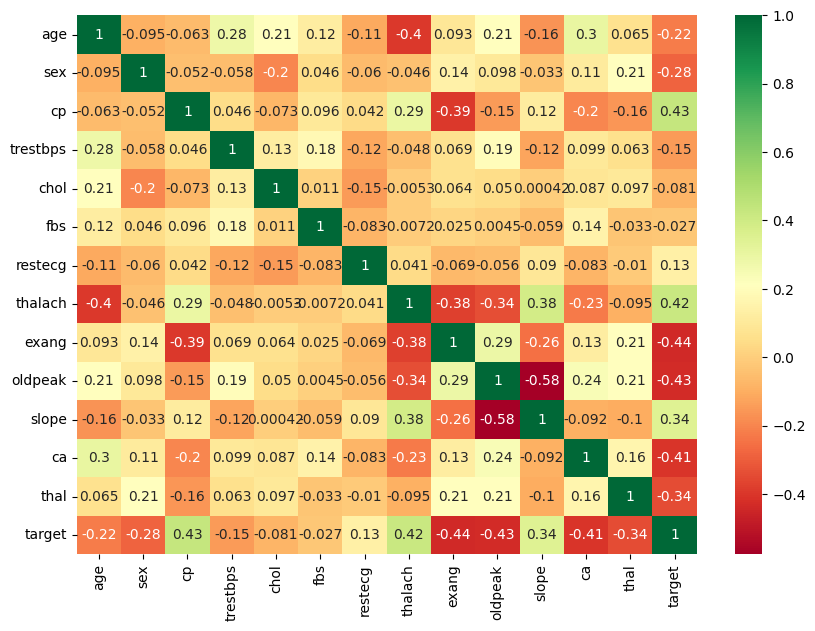

In [23]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

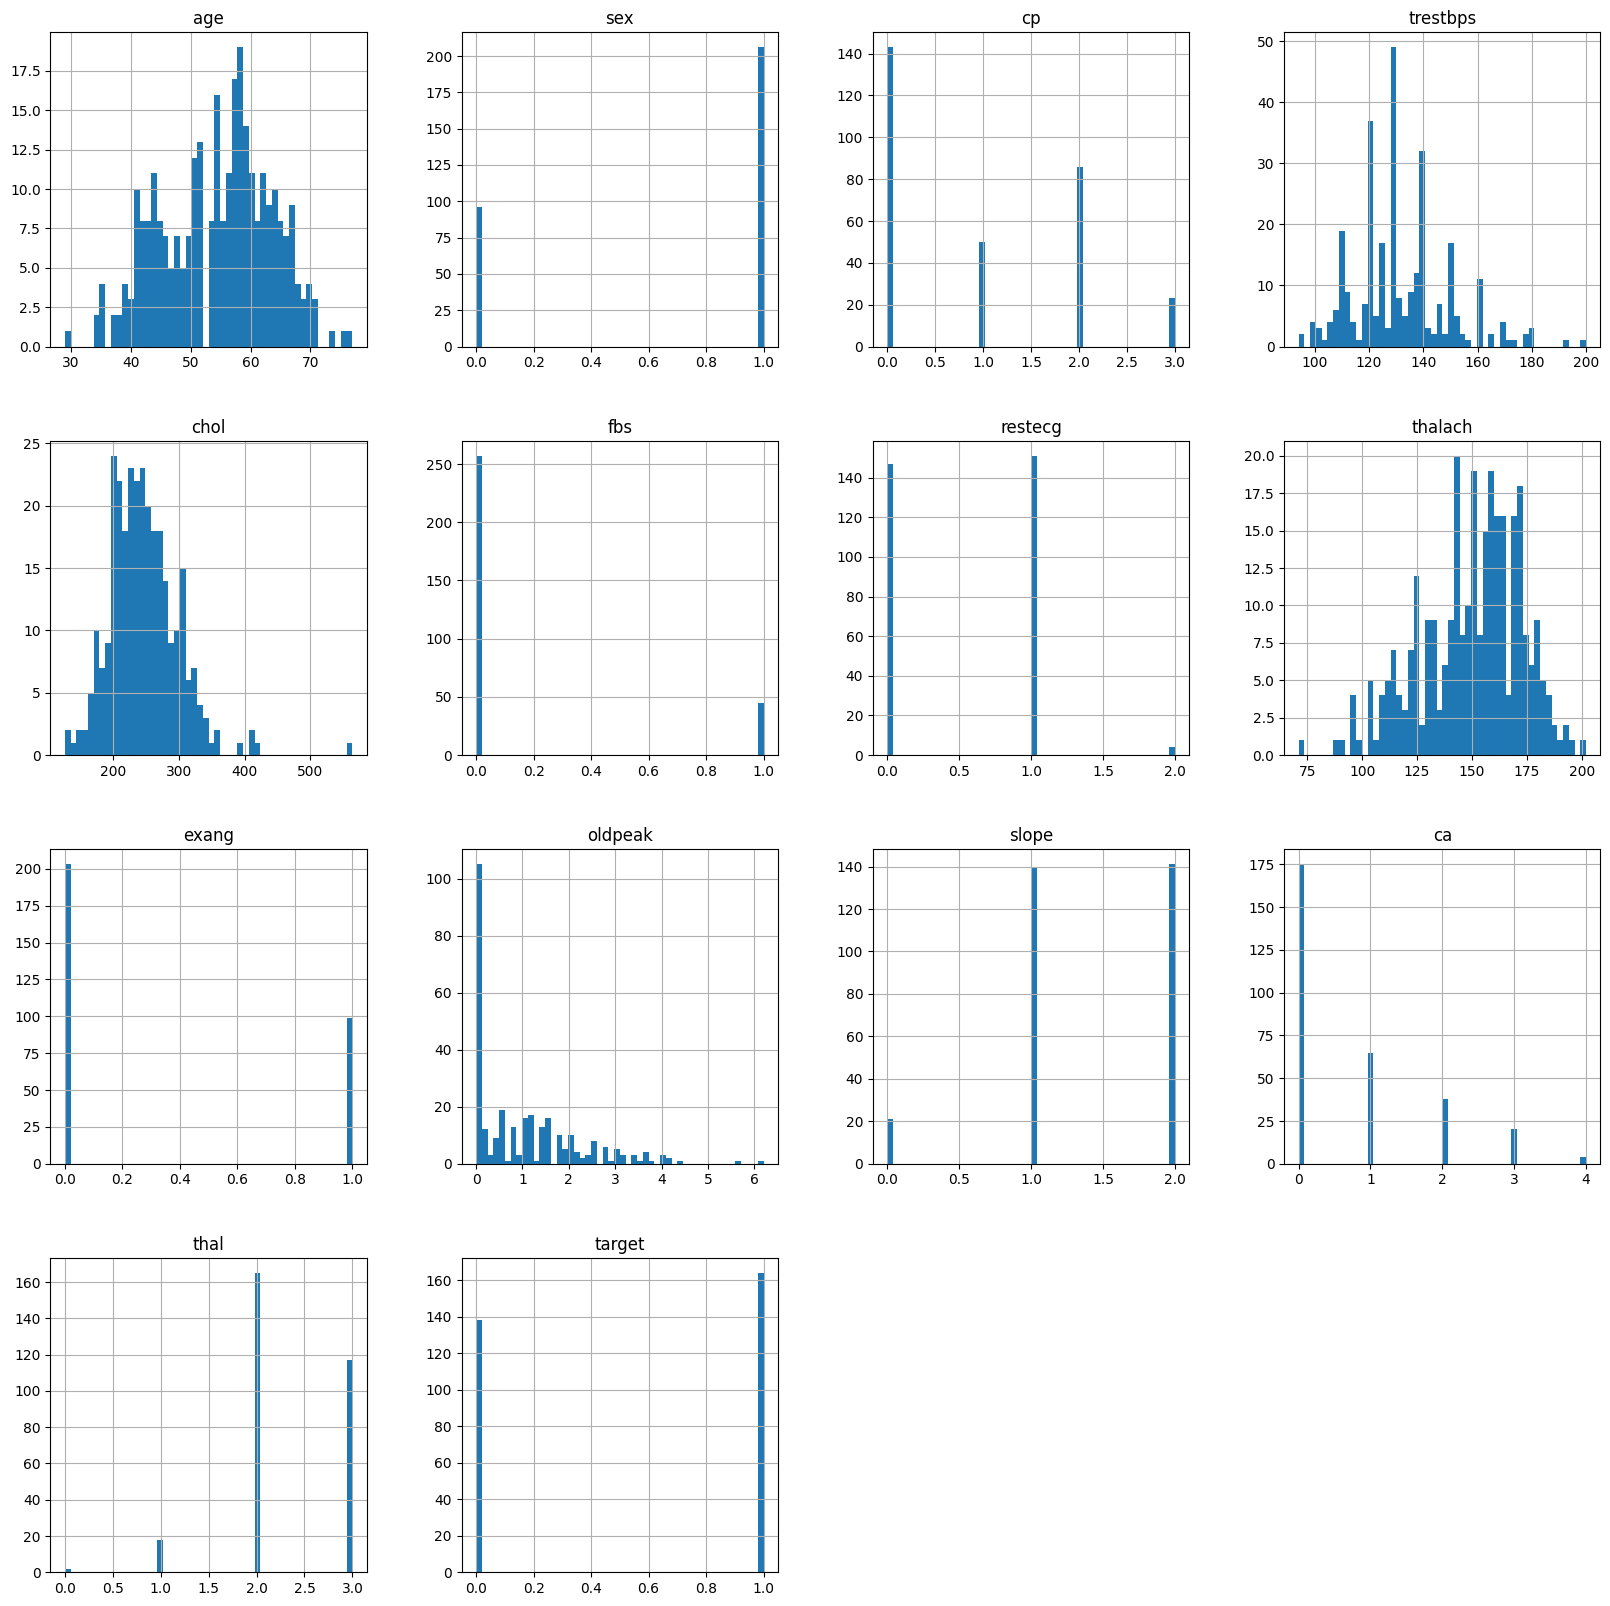

In [24]:
df.hist(bins=50,figsize=(20,20))
plt.show()

In [25]:
print(cate_val)


['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


In [26]:
if 'sex' in cate_val:
    cate_val.remove('sex')
if 'output' in cate_val:
    cate_val.remove('output')
df=pd.get_dummies(df,columns=cate_val,drop_first=True)

In [28]:
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3,target_1
0,63,1,145,233,150,2.3,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,True
1,37,1,130,250,187,3.5,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True
2,41,0,130,204,172,1.4,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True
3,56,1,120,236,178,0.8,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,True
4,57,0,120,354,163,0.6,False,False,False,False,True,False,True,False,True,False,False,False,False,False,True,False,True


In [29]:
%pip install scikit-learn
#feature scalling
from sklearn.preprocessing import StandardScaler

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [30]:
st=StandardScaler()
df[cont_val]=st.fit_transform(df[cont_val])

In [31]:
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3,target_1
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,True
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,True
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,False,False,False,False,True,False,True,False,True,False,False,False,False,False,True,False,True


In [32]:
#splitting the dataset into the training set and test set
X=df.drop('target_1',axis=1)
y=df['target_1']

In [33]:
# y=df['output']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
X_train

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
132,-1.375021,1,-0.661712,0.938690,0.543632,-0.899544,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False
203,1.503322,1,2.760154,0.532247,0.018826,0.480328,False,True,False,True,False,False,True,True,False,False,False,False,False,False,False,True
197,1.392616,1,-0.376556,0.145158,0.587366,-0.727060,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True
75,0.064151,0,0.193755,0.067741,0.499898,0.307844,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
177,1.060500,1,0.478910,1.712868,0.368697,-0.899544,False,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,-1.485726,1,-1.232023,-1.441906,0.368697,-0.899544,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
71,-0.378671,1,-2.144521,-0.377412,0.193761,-0.899544,False,True,False,False,True,False,True,False,True,True,False,False,False,False,False,True
106,1.614027,1,1.619532,-0.241930,-0.812118,-0.813302,False,False,True,True,False,False,False,True,False,True,False,False,False,False,True,False
271,0.728383,1,0.136724,-0.241930,-0.199843,1.342748,False,False,True,False,True,False,False,True,False,False,True,False,False,False,True,False


In [37]:
y_train

132     True
203    False
197    False
75      True
177    False
       ...  
189    False
71      True
106     True
271    False
102     True
Name: target_1, Length: 241, dtype: bool

In [38]:
X_test

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
180,0.064151,1,0.022661,2.061248,-0.768384,0.135360,False,False,False,False,True,False,True,True,False,True,False,False,False,False,False,True
229,1.060500,1,-0.376556,1.209652,-0.812118,0.652812,False,True,False,False,True,False,True,True,False,False,False,False,False,False,False,True
111,0.285561,1,1.049221,-2.332210,1.024705,-0.727060,False,True,False,True,True,False,False,False,True,True,False,False,False,False,False,True
247,1.281911,1,1.619532,-0.009677,-1.293190,-0.899544,True,False,False,False,True,False,True,True,False,False,False,True,False,True,False,False
60,1.835438,0,-1.232023,0.358057,-0.855851,-0.899544,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,-0.378671,1,0.478910,0.996754,-1.205722,2.722620,False,False,False,False,True,False,True,True,False,False,False,True,False,False,False,True
104,-0.489377,1,-0.148432,-0.977399,0.587366,-0.899544,False,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False
300,1.503322,1,0.707035,-1.035462,-0.374779,2.032684,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True
194,0.617678,1,0.478910,-1.190298,0.237495,1.687716,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False


In [39]:
y_test

180    False
229    False
111     True
247    False
60      True
       ...  
250    False
104     True
300    False
194    False
185    False
Name: target_1, Length: 61, dtype: bool

In [40]:
#LOGISTIC REGRESSION
#show output
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3,target_1
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,True
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,True
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,False,False,False,False,True,False,True,False,True,False,False,False,False,False,True,False,True


# Logistic Regression

In [41]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

In [42]:

from sklearn.linear_model import LogisticRegression

In [43]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [44]:
y_pred1=lr.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy_score(y_test,y_pred1)

0.9016393442622951

In [47]:
cm = confusion_matrix(y_test, y_pred1)
pd.DataFrame(cm, columns = ["No", "Yes"], index = ["No", "Yes"])

,No,Yes
No,27,2
Yes,4,28


In [48]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

       False       0.87      0.93      0.90        29
        True       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



# SUPPORT VECTOR MACHINE (SVM)

In [49]:
from sklearn import svm

In [50]:
svm=svm.SVC()


In [51]:
svm.fit(X_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [52]:
y_pred2=svm.predict(X_test)

In [53]:
accuracy_score(y_test,y_pred2)

0.8688524590163934

In [54]:
cm = confusion_matrix(y_test, y_pred2)
pd.DataFrame(cm, columns = ["No", "Yes"], index = ["No", "Yes"])

,No,Yes
No,27,2
Yes,6,26


In [55]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

       False       0.82      0.93      0.87        29
        True       0.93      0.81      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



# K-Nearest Neighbor(KNN)

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
knn=KNeighborsClassifier()

In [58]:
knn.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [59]:
y_pred3=knn.predict(X_test)

In [60]:
accuracy_score(y_test,y_pred3)

0.8688524590163934

In [61]:
cm = confusion_matrix(y_test, y_pred3)
pd.DataFrame(cm, columns = ["No", "Yes"], index = ["No", "Yes"])

,No,Yes
No,26,3
Yes,5,27


In [62]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

       False       0.84      0.90      0.87        29
        True       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [63]:
score=[]

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [64]:
score

[0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426,
 0.8688524590163934,
 0.8688524590163934,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426,
 0.8524590163934426,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426,
 0.8524590163934426,
 0.8688524590163934,
 0.8688524590163934,
 0.8524590163934426,
 0.8688524590163934,
 0.8524590163934426,
 0.8688524590163934,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426]

In [65]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.8524590163934426

In [66]:
#NON-LINEAR ML ALGORITHM
# df=pd.read_csv('heart project.csv')
df = pd.read_csv(r"C:\Users\vivek\OneDrive\Desktop\Project\Dataset\heart.csv")


In [67]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [68]:
df=df.drop_duplicates()

In [69]:
df.shape

(302, 14)

In [70]:
# x=df.drop('output',axis=1)
# y=df['output']

X=df.drop('target',axis=1)
y=df['target']

In [71]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# DECISION TREE CLASSIFIER

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
dt=DecisionTreeClassifier()

In [74]:
dt.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [75]:
y_pred4=dt.predict(X_test)

In [76]:
accuracy_score(y_test,y_pred4)

0.7704918032786885

In [77]:
cm = confusion_matrix(y_test, y_pred4)
pd.DataFrame(cm, columns = ["No", "Yes"], index = ["No", "Yes"])

,No,Yes
No,25,4
Yes,10,22


In [78]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.71      0.86      0.78        29
           1       0.85      0.69      0.76        32

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



# RANDOM FOREST CLASSIFIER

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
rf=RandomForestClassifier()

In [81]:
rf.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [82]:
y_pred5=rf.predict(X_test)

In [83]:
accuracy_score(y_test,y_pred5)

0.8688524590163934

In [84]:
cm = confusion_matrix(y_test, y_pred5)
pd.DataFrame(cm, columns = ["No", "Yes"], index = ["No", "Yes"])

,No,Yes
No,25,4
Yes,4,28


In [85]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



# GRADIENT BOOSTING CLASSIFIER

In [86]:
from sklearn.ensemble import GradientBoostingClassifier

In [87]:
gbc=GradientBoostingClassifier()

In [88]:
gbc.fit(X_train,y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [89]:
y_pred6=gbc.predict(X_test)

In [90]:
accuracy_score(y_test,y_pred6)

0.8524590163934426

In [91]:
cm = confusion_matrix(y_test, y_pred6)
pd.DataFrame(cm, columns = ["No", "Yes"], index = ["No", "Yes"])

,No,Yes
No,26,3
Yes,6,26


In [92]:
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



# NAIVE BAYES CLASSIFIER

In [93]:
from sklearn.naive_bayes import GaussianNB

In [94]:
gnb=GaussianNB()

In [95]:
gnb.fit(X_train,y_train)

,priors,None
,var_smoothing,1e-09


In [96]:
y_pred7=gnb.predict(X_test)

In [97]:
accuracy_score(y_test,y_pred7)

0.8852459016393442

In [98]:
cm = confusion_matrix(y_test, y_pred7)
pd.DataFrame(cm, columns = ["No", "Yes"], index = ["No", "Yes"])

,No,Yes
No,27,2
Yes,5,27


In [99]:
print(classification_report(y_test,y_pred7))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [100]:
final_df=pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB','NB'],
                  'ACC':[accuracy_score(y_test,y_pred1),
                         accuracy_score(y_test,y_pred2),
                         accuracy_score(y_test,y_pred3),
                         accuracy_score(y_test,y_pred4),
                         accuracy_score(y_test,y_pred5),
                         accuracy_score(y_test,y_pred6),
                         accuracy_score(y_test,y_pred7)]})

In [101]:
final_df

,Models,ACC
0,LR,0.901639
1,SVM,0.868852
2,KNN,0.868852
3,DT,0.770492
4,RF,0.868852
5,GB,0.852459
6,NB,0.885246


In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

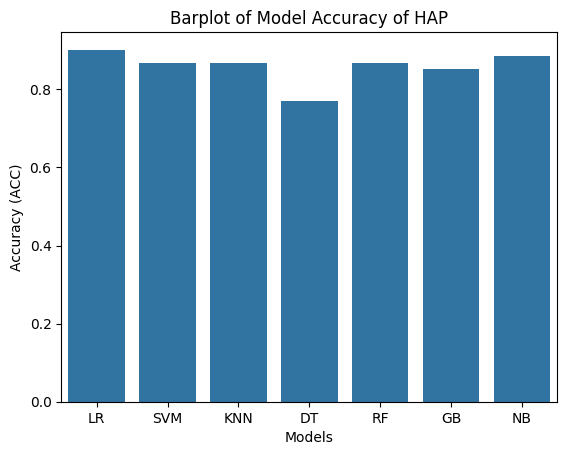

In [103]:
# Create a barplot
sns.barplot(x=final_df['Models'], y=final_df['ACC'])

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy (ACC)')
plt.title('Barplot of Model Accuracy of HAP')

plt.show()

In [104]:
# X=df.drop('output',axis=1)
# y=df['output']
X=df.drop('target',axis=1)
y=df['target']

In [105]:
X.shape

(302, 13)

In [106]:
models_dict = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': svm,
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Naive Bayes': GaussianNB()
}

In [141]:
# from sklearn.linear_model import LogisticRegression
best_model_name='Logistic Regression'
heart_model=models_dict[best_model_name]
heart_model.fit(X,y)

C:\Users\vivek\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [142]:
# lr=LogisticRegression()
# lr.fit(X,y)

In [ ]:


input_data=(51,1,0,125,212,0,1,168,0,1.0,2,2,3)

new_df = pd.DataFrame([input_data], columns=X.columns)

In [144]:
new_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,51,1,0,125,212,0,1,168,0,1.0,2,2,3


In [145]:
# features used during training (if you still have X_train or saved feature list)
print("Model coef shape:", lr.coef_.shape)          # -> (n_classes, n_features)
print("New df shape:", new_df.shape)                # -> (n_samples, n_features_current)
print("New df columns:", list(new_df.columns))


Model coef shape: (1, 22)
New df shape: (1, 13)
New df columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [149]:
# Apply the same preprocessing as the training data
new_df_processed = new_df.copy()

# Apply feature scaling to continuous variables
new_df_processed[cont_val] = st.transform(new_df_processed[cont_val])

# Apply one-hot encoding to categorical variables
# new_df_processed = pd.get_dummies(new_df_processed, columns=cate_val, drop_first=True)

# Ensure all columns match the training data
missing_cols = set(X.columns) - set(new_df_processed.columns)
for col in missing_cols:
    new_df_processed[col] = 0

# Reorder columns to match training data
new_df_processed = new_df_processed[X.columns]

prediction = heart_model.predict(new_df_processed)

if prediction[0] == 0:
    print("No Disease")
else:
    print("Disease")


No Disease


In [150]:
import pickle

In [151]:
filename = 'heart_model.pkl'
pickle.dump(heart_model, open(filename, 'wb'))

In [ ]:
# import joblib

In [ ]:
# joblib.dump(lr,'model_joblib_heartprediction')

In [ ]:
# model=joblib.load('model_joblib_heartprediction')

In [ ]:
# model.predict(new_row)

In [ ]:
# #GUI
# from tkinter import *
# import joblib

In [ ]:
# import tkinter as tk
# from tkinter import Label, Entry, Button, messagebox
# import joblib

# # Create the GUI window
# master = tk.Tk()
# master.title("Heart Diseases Prediction System")

# # Function to make predictions
# def show_entry_fields():
#     try:
#         p1 = int(e1.get())
#         p2 = int(e2.get())
#         p3 = int(e3.get())
#         p4 = int(e4.get())
#         p5 = int(e5.get())
#         p6 = int(e6.get())
#         p7 = int(e7.get())
#         p8 = int(e8.get())
#         p9 = int(e9.get())
#         p10 = float(e10.get())
#         p11 = int(e11.get())
#         p12 = int(e12.get())
#         p13 = int(e13.get())

#         model = joblib.load('model_joblib_heartprediction')
#         result = model.predict([[p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13]])

#         if result == 0:
#             prediction_text.set("No Heart Diseases")
#         else:
#             prediction_text.set("Possibility of Heart Diseases")
#     except ValueError:
#         messagebox.showerror("Error", "Invalid input. Please enter numeric values.")

# # Create input fields and labels
# Label(master, text="Heart Diseases Prediction System", bg="Red", fg="yellow",width=50,font=('Helvetica', 24, 'bold')).grid(row=0, columnspan=2)
# master.configure(bg="lightblue")

# Label(master, text="Enter your Age",font=('Helvetica', 20, 'bold')).grid(row=1)
# Label(master, text="Male or Female[1/0]",font=('Helvetica', 20, 'bold')).grid(row=2)
# Label(master, text="Enter value of CP",font=('Helvetica', 20, 'bold')).grid(row=3)
# Label(master, text="Enter value of trtbps",font=('Helvetica', 20, 'bold')).grid(row=4)
# Label(master, text="Enter value of chol",font=('Helvetica', 20, 'bold')).grid(row=5)
# Label(master, text="Enter value of fbs",font=('Helvetica', 20, 'bold')).grid(row=6)
# Label(master, text="Enter value of restecg",font=('Helvetica', 20, 'bold')).grid(row=7)
# Label(master, text="Enter value of thalachh",font=('Helvetica', 20, 'bold')).grid(row=8)
# Label(master, text="Enter value of exng",font=('Helvetica', 20, 'bold')).grid(row=9)
# Label(master, text="Enter value of oldpeak",font=('Helvetica', 20, 'bold')).grid(row=10)
# Label(master, text="Enter value of slp",font=('Helvetica', 20, 'bold')).grid(row=11)
# Label(master, text="Enter value of caa",font=('Helvetica', 20, 'bold')).grid(row=12)
# Label(master, text="Enter value of thall",font=('Helvetica', 20, 'bold')).grid(row=13)

# # Create input fields
# e1 = Entry(master)
# e1.grid(row=1, column=1)
# e2 = Entry(master)
# e2.grid(row=2, column=1)
# e3 = Entry(master)
# e3.grid(row=3, column=1)
# e4 = Entry(master)
# e4.grid(row=4, column=1)
# e5 = Entry(master)
# e5.grid(row=5, column=1)
# e6 = Entry(master)
# e6.grid(row=6, column=1)
# e7 = Entry(master)
# e7.grid(row=7, column=1)
# e8 = Entry(master)
# e8.grid(row=8, column=1)
# e9 = Entry(master)
# e9.grid(row=9, column=1)
# e10 = Entry(master)
# e10.grid(row=10, column=1)
# e11 = Entry(master)
# e11.grid(row=11, column=1)
# e12 = Entry(master)
# e12.grid(row=12, column=1)
# e13 = Entry(master)
# e13.grid(row=13, column=1)

# # Create the prediction button
# Button(master, text='Predict',font=('Helvetica', 20, 'bold'), command=show_entry_fields).grid(row=50, columnspan=2,pady=4)

# # Create a variable to display prediction result
# prediction_text = tk.StringVar()
# Label(master, textvariable=prediction_text).grid(row=15, columnspan=2)

# # Start the GUI main loop
# master.mainloop()
